In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import itertools
import warnings
import seaborn as sns
from sklearn.dummy import DummyClassifier
#from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
warnings.filterwarnings('ignore')
import re
import nltk
import string
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from nltk.stem import WordNetLemmatizer
import spacy
import en_core_web_lg
nlp = en_core_web_lg.load()
from wordcloud import WordCloud, STOPWORDS
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.multiclass import OneVsRestClassifier
from yellowbrick.text import FreqDistVisualizer
import dataframe_image as dfi
from mlxtend.feature_selection import ColumnSelector

import gensim
from gensim import corpora
from gensim.models.ldamodel import LdaModel
from gensim import models
import pyLDAvis.gensim_models

In [2]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\guddu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [3]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\guddu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
!pip install spacy

In [5]:
!python -m spacy download en_core_web_lg 

2022-08-26 16:10:29.448096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'cudart64_110.dll'; dlerror: cudart64_110.dll not found
2022-08-26 16:10:29.448246: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-08-26 16:10:55.421939: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'nvcuda.dll'; dlerror: nvcuda.dll not found
2022-08-26 16:10:55.421997: W tensorflow/stream_executor/cuda/cuda_driver.cc:269] failed call to cuInit: UNKNOWN ERROR (303)
2022-08-26 16:10:55.498172: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:169] retrieving CUDA diagnostic information for host: gudduSHAH
2022-08-26 16:10:55.498913: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:176] hostname: gudduSHAH


[+] Download and installation successful
You can now load the package via spacy.load('en_core_web_lg')


In [6]:
!python -m pip install wordcloud

In [7]:
!pip install yellowbrick

In [8]:
!pip install dataframe-image

In [9]:
!pip install mlxtend

In [10]:
nlp = spacy.load("en_core_web_lg")

In [11]:
wiki = pd.read_csv("C:\\Users\\guddu\\wiki_movie_plots_deduped.csv")

In [12]:
wiki.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1901,Kansas Saloon Smashers,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Kansas_Saloon_Sm...,"A bartender is working at a saloon, serving dr..."
1,1901,Love by the Light of the Moon,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/Love_by_the_Ligh...,"The moon, painted with a smiling face hangs ov..."
2,1901,The Martyred Presidents,American,Unknown,NaN,unknown,https://en.wikipedia.org/wiki/The_Martyred_Pre...,"The film, just over a minute long, is composed..."
3,1901,"Terrible Teddy, the Grizzly King",American,Unknown,NaN,unknown,"https://en.wikipedia.org/wiki/Terrible_Teddy,_...",Lasting just 61 seconds and consisting of two ...
4,1902,Jack and the Beanstalk,American,"George S. Fleming, Edwin S. Porter",NaN,unknown,https://en.wikipedia.org/wiki/Jack_and_the_Bea...,The earliest known adaptation of the classic f...


In [13]:
wiki.describe()

,Release Year
count,34886.000000
mean,1981.314252
std,27.815174
min,1901.000000
25%,1957.000000
50%,1988.000000
75%,2007.000000
max,2017.000000


In [14]:
wiki.shape

(34886, 8)

In [15]:
wiki.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34886 entries, 0 to 34885
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Release Year      34886 non-null  int64 
 1   Title             34886 non-null  object
 2   Origin/Ethnicity  34886 non-null  object
 3   Director          34886 non-null  object
 4   Cast              33464 non-null  object
 5   Genre             34886 non-null  object
 6   Wiki Page         34886 non-null  object
 7   Plot              34886 non-null  object
dtypes: int64(1), object(7)
memory usage: 2.1+ MB


Text(0, 0.5, 'Frequency of Occurence')

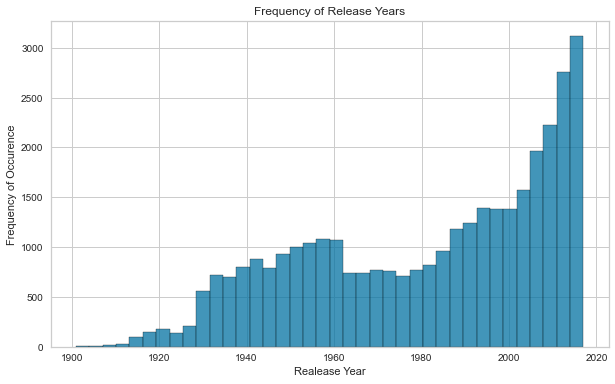

In [16]:
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = wiki['Release Year'])
plt.title('Frequency of Release Years')
plt.xlabel('Realease Year')
plt.ylabel('Frequency of Occurence')
#fig.savefig('./images/freqofreleaseyear.png');

Text(0, 0.5, 'Frequency Distribution')

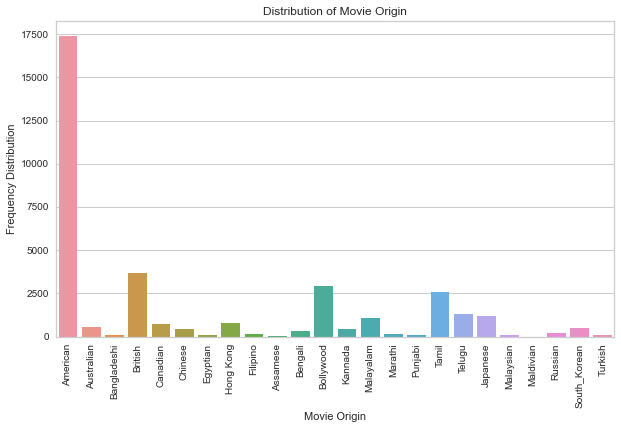

In [17]:
fig, ax = plt.subplots(figsize=(10,6))

sns.countplot(x = wiki['Origin/Ethnicity'])
plt.gcf().subplots_adjust(bottom=0.15)
plt.xticks(rotation = 90)
plt.title('Distribution of Movie Origin')
plt.xlabel('Movie Origin')
plt.ylabel('Frequency Distribution')

In [18]:
wiki_df = wiki.loc[wiki['Genre']!='unknown']
wiki_df.reset_index(drop = True, inplace = True)

In [19]:
wiki_df.head(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot
0,1903,The Great Train Robbery,American,Edwin S. Porter,NaN,western,https://en.wikipedia.org/wiki/The_Great_Train_...,The film opens with two bandits breaking into ...
1,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...
2,1906,Dream of a Rarebit Fiend,American,Wallace McCutcheon and Edwin S. Porter,NaN,short,https://en.wikipedia.org/wiki/Dream_of_a_Rareb...,The Rarebit Fiend gorges on Welsh rarebit at a...
3,1906,From Leadville to Aspen: A Hold-Up in the Rockies,American,Francis J. Marion and Wallace McCutcheon,NaN,short action/crime western,https://en.wikipedia.org/wiki/From_Leadville_t...,The film features a train traveling through th...
4,1906,Kathleen Mavourneen,American,Edwin S. Porter,NaN,short film,https://en.wikipedia.org/wiki/Kathleen_Mavourn...,Irish villager Kathleen is a tenant of Captain...


In [20]:
genres=pd.value_counts(wiki_df.Genre)

print('There are ',len(genres), 'different Genres in the dataset:')
print('-'*50)
print(genres)

There are  2264 different Genres in the dataset:
--------------------------------------------------
drama                            5964
comedy                           4379
horror                           1167
action                           1098
thriller                          966
                                 ... 
cbc-tv miniseries                   1
bio-drama                           1
national film board docudrama       1
cult drama                          1
horror romantic comedy              1
Name: Genre, Length: 2264, dtype: int64


In [21]:
wiki_df.nunique()

Release Year          114
Title               27084
Origin/Ethnicity       24
Director            10400
Cast                27081
Genre                2264
Wiki Page           28447
Plot                28351
dtype: int64

In [22]:
top_genres = pd.DataFrame(genres[:6]).reset_index()
top_genres.columns = ['genres', 'number_of_movies']
top_genres

,genres,number_of_movies
0,drama,5964
1,comedy,4379
2,horror,1167
3,action,1098
4,thriller,966
5,romance,923


Text(0, 0.5, 'frequency')

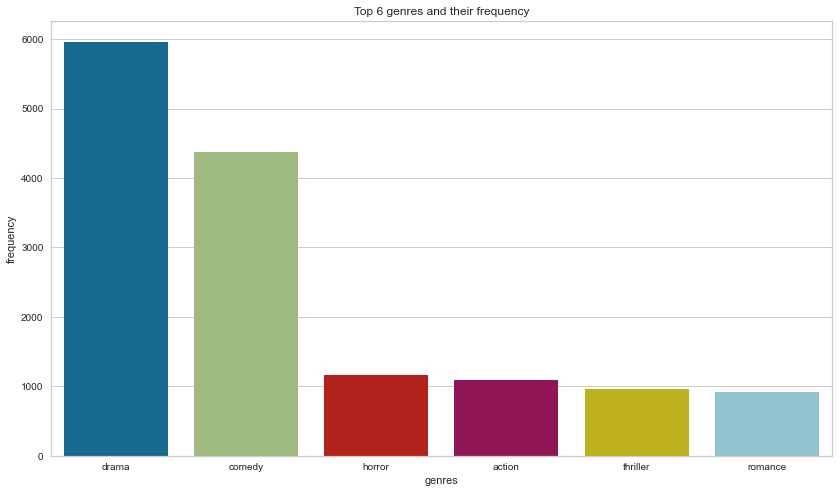

In [23]:
fig, ax = plt.subplots(figsize=(14,8))

sns.barplot(top_genres['genres'], top_genres['number_of_movies'])
plt.title('Top 6 genres and their frequency')
plt.xlabel('genres')
plt.ylabel('frequency')

In [24]:
conditions = [wiki_df['Genre']=='drama', wiki_df['Genre']=='comedy', wiki_df['Genre']=='horror', wiki_df['Genre']=='action', wiki_df['Genre']=='thriller',
             wiki_df['Genre']=='romance']
choices = [1,2,3,4,5,6]
wiki_df['labels'] = np.select(conditions, choices, 0)

In [25]:
wiki_df.sample(5)

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,labels
27862,1988,Esper Mami: Hoshizora no Dancing Doll[4],Japanese,Unknown,NaN,"magical girl, family, drama",https://en.wikipedia.org/wiki/Esper_Mami,Mami Sakura used to be a normal junior high sc...,0
11692,1993,Last Action Hero,American,John McTiernan,"Arnold Schwarzenegger, Austin O'Brien, Charles...",comedy,https://en.wikipedia.org/wiki/Last_Action_Hero,Danny Madigan is a teenager living in a crime-...,2
3860,1944,Take It Big,American,Frank McDonald,"Harriet Hilliard, Jack Haley, Ozzie Nelson",musical comedy,https://en.wikipedia.org/wiki/Take_It_Big,"She is a singer in a nightclub, but Jerry Clin...",0
24905,2014,Raja Natwarlal,Bollywood,Kunal Deshmukh,"Emraan Hashmi, Humaima Malick, Paresh Rawal, D...",thriller,https://en.wikipedia.org/wiki/Raja_Natwarlal,Raja (Emraan Hashmi) is a small-time conman wh...,5
14285,2005,Elektra,American,Rob Bowman,"Jennifer Garner, Terence Stamp, Kirsten Prout",action,https://en.wikipedia.org/wiki/Elektra_(2005_film),"After being killed in Daredevil, Elektra Natch...",4


In [26]:
wiki_df['labels'].value_counts()

0    14306
1     5964
2     4379
3     1167
4     1098
5      966
6      923
Name: labels, dtype: int64

In [27]:
df_to_use = (wiki_df.loc[wiki_df['labels']!=0]).reset_index(drop = True)

In [28]:
# We are now left with about 14 thousand rows of data
df_to_use.head()

,Release Year,Title,Origin/Ethnicity,Director,Cast,Genre,Wiki Page,Plot,labels
0,1904,The Suburbanite,American,Wallace McCutcheon,NaN,comedy,https://en.wikipedia.org/wiki/The_Suburbanite,The film is about a family who move to the sub...,2
1,1907,How Brown Saw the Baseball Game,American,Unknown,Unknown,comedy,https://en.wikipedia.org/wiki/How_Brown_Saw_th...,Before heading out to a baseball game at a nea...,2
2,1907,Laughing Gas,American,Edwin Stanton Porter,"Bertha Regustus, Edward Boulden",comedy,https://en.wikipedia.org/wiki/Laughing_Gas_(fi...,The plot is that of a black woman going to the...,2
3,1908,The Adventures of Dollie,American,D. W. Griffith,"Arthur V. Johnson, Linda Arvidson",drama,https://en.wikipedia.org/wiki/The_Adventures_o...,On a beautiful summer day a father and mother ...,1
4,1908,The Black Viper,American,D. W. Griffith,D. W. Griffith,drama,https://en.wikipedia.org/wiki/The_Black_Viper,A thug accosts a girl as she leaves her workpl...,1


In [29]:
assigned_label = pd.DataFrame(sorted(list(zip(df_to_use['Genre'].unique(), df_to_use['labels'].unique())), key = lambda x : x[1], reverse = False), columns = ['genres', 'labels'])
pd.merge(assigned_label, top_genres)

,genres,labels,number_of_movies
0,drama,1,5964
1,comedy,2,4379
2,horror,3,1167
3,action,4,1098
4,thriller,5,966
5,romance,6,923


Text(0, 0.5, 'Frequency of Occurence')

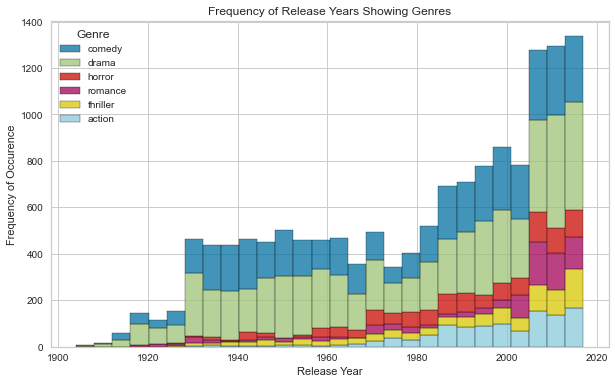

In [30]:
# df_to_use.groupby(['Release Year', 'Genre']).agg('count')
fig, ax = plt.subplots(figsize=(10,6))

sns.histplot(x = 'Release Year', hue = 'Genre', data = df_to_use, multiple = 'stack')
plt.title('Frequency of Release Years Showing Genres')
plt.xlabel('Release Year')
plt.ylabel('Frequency of Occurence')

In [31]:
df_to_use.drop(columns = ['Release Year', 'Title', 'Origin/Ethnicity', 'Director', 'Cast', 'Wiki Page'], axis = 1, inplace = True)


In [32]:
df_to_use.head(10)

,Genre,Plot,labels
0,comedy,The film is about a family who move to the sub...,2
1,comedy,Before heading out to a baseball game at a nea...,2
2,comedy,The plot is that of a black woman going to the...,2
3,drama,On a beautiful summer day a father and mother ...,1
4,drama,A thug accosts a girl as she leaves her workpl...,1
5,comedy,A young couple decides to elope after being ca...,2
6,drama,No prints of the first American film adaptatio...,1
7,drama,A rejected admirer sets up a trap to kill his ...,1
8,drama,"John Wharton, the husband of a true and trusti...",1
9,drama,An old woman sends a girl begging in the stree...,1


In [33]:
df_to_use.describe()

,labels
count,14497.000000
mean,2.275160
std,1.528956
min,1.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,6.000000


# Cleaning up the 'Plot' column for Analysis

In [34]:
df_to_use['Plot'][5]

"A young couple decides to elope after being caught in the midst of a romantic moment by the woman's angry father. They make plans to leave, but a thief discovers their plans and hides in their trunk and waits for the right moment to steal their belongings."

# Total number of words in the Plot description

In [35]:
def word_length(text):
    num_of_words = 0
    for row in text:
        words = [word for word in row.split(' ')]
        num_of_words += len(words)
    return num_of_words

raw_length = word_length(df_to_use['Plot'])

In [36]:
raw_length

5240143

# Total number of UNIQUE words in the plot description

In [37]:
def unique_word_length(text):
    unique_words = set()
    for row in text:
        words = [word for word in row.split(' ')]
        unique_words.update(words)
    return len(unique_words)

raw_unique_length = unique_word_length(df_to_use['Plot'])

In [38]:
raw_unique_length

253147

# Creating our stopwords list and adding some more words that are very common in the descriptions.

In [39]:
stopwords_list = stopwords.words('english')
stopwords_list += list(string.punctuation)
stopwords_list += ['one', 'two', 'go','goes', 'get', 'also', 'however', 'tells'] 
stopwords_list += [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

In [40]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub('\W', ' ', text)
    text = re.sub('\s+', ' ', text)
    text = re.sub('\d+', ' ', text)
    text = text.strip(' ')
    text = word_tokenize(text)
    text = ' '.join(text)
    text = nlp(text)
    text = [w.lemma_ for w in text]
    text = [w for w in text if w not in stopwords_list]
    text = ' '.join(text)
    return text

<>:12: DeprecationWarning: invalid escape sequence \W
<>:13: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \d
<>:12: DeprecationWarning: invalid escape sequence \W
<>:13: DeprecationWarning: invalid escape sequence \s
<>:14: DeprecationWarning: invalid escape sequence \d
C:\Users\guddu\AppData\Local\Temp\ipykernel_18936\669546517.py:12: DeprecationWarning: invalid escape sequence \W
  text = re.sub('\W', ' ', text)
C:\Users\guddu\AppData\Local\Temp\ipykernel_18936\669546517.py:13: DeprecationWarning: invalid escape sequence \s
  text = re.sub('\s+', ' ', text)
C:\Users\guddu\AppData\Local\Temp\ipykernel_18936\669546517.py:14: DeprecationWarning: invalid escape sequence \d
  text = re.sub('\d+', ' ', text)


In [41]:
new_df = df_to_use.copy(deep = True)

In [42]:
new_df['Plot'] = new_df['Plot'].map(lambda x : clean_text(x))

In [43]:
new_df['Plot'][5]

'young couple decide elope catch midst romantic moment woman angry father make plan leave thief discover plan hide trunk wait right moment steal belonging'

In [44]:
def word_length(text):
    num_of_words = 0
    for row in text:
        words = [word for word in row.split(' ')]
        num_of_words += len(words)
    return num_of_words

clean_length = word_length(new_df['Plot'])

In [45]:
clean_length

2867662

In [46]:
def unique_word_length(text):
    unique_words = set()
    for row in text:
        words = [word for word in row.split(' ')]
        unique_words.update(words)
    return len(unique_words)

clean_unique_length = unique_word_length(new_df['Plot'])

In [47]:
clean_unique_length

70850

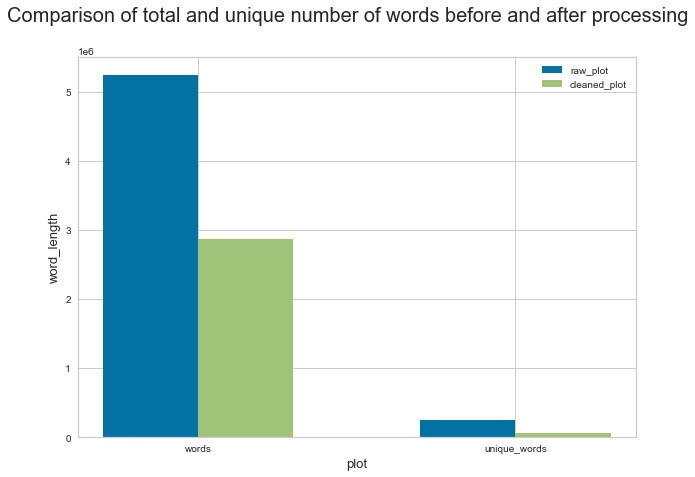

In [48]:
plot_length = [[raw_length, clean_length], [raw_unique_length, clean_unique_length]]
length_df = pd.DataFrame(plot_length, columns = ['num_of_words', 'num_of_unique_words'])
length_df['index'] = ['raw_plot', 'cleaned_plot']

y1 = length_df['num_of_words']
y2 = length_df['num_of_unique_words']

plt.figure(figsize=(10,7))
ind = np.arange(2)

width = 0.3       

# Plotting
plt.bar(ind, y1, width, label='raw_plot')
plt.bar(ind + width, y2, width, label='cleaned_plot')

plt.xlabel('plot', size = 13)
plt.ylabel('word_length', size = 13)
plt.suptitle('Comparison of total and unique number of words before and after processing', size = 20)
plt.xticks(ind + width / 2, ('words', 'unique_words'))
plt.legend(loc='best')
plt.show()

In [49]:
length_df

,num_of_words,num_of_unique_words,index
0,5240143,2867662,raw_plot
1,253147,70850,cleaned_plot


In [50]:
new_df.head()

,Genre,Plot,labels
0,comedy,film family move suburb hope quiet life thing ...,2
1,comedy,head baseball game nearby ballpark sport fan m...,2
2,comedy,plot black woman dentist toothache give laugh ...,2
3,drama,beautiful summer day father mother take daught...,1
4,drama,thug accost girl leave workplace man rescue th...,1


In [51]:
new_df.Plot

0        film family move suburb hope quiet life thing ...
1        head baseball game nearby ballpark sport fan m...
2        plot black woman dentist toothache give laugh ...
3        beautiful summer day father mother take daught...
4        thug accost girl leave workplace man rescue th...
                               ...                        
14492    hasan twelve year old boy live young sibling m...
14493    night three car carry small group man police o...
14494    film open senegalese boy name khadim tell litt...
14495      musician salih gürkan describe adventure cousin
14496    zafer sailor live mother döndü coastal village...
Name: Plot, Length: 14497, dtype: object

# Distribution of words in plot of movie title for each genre

Drama

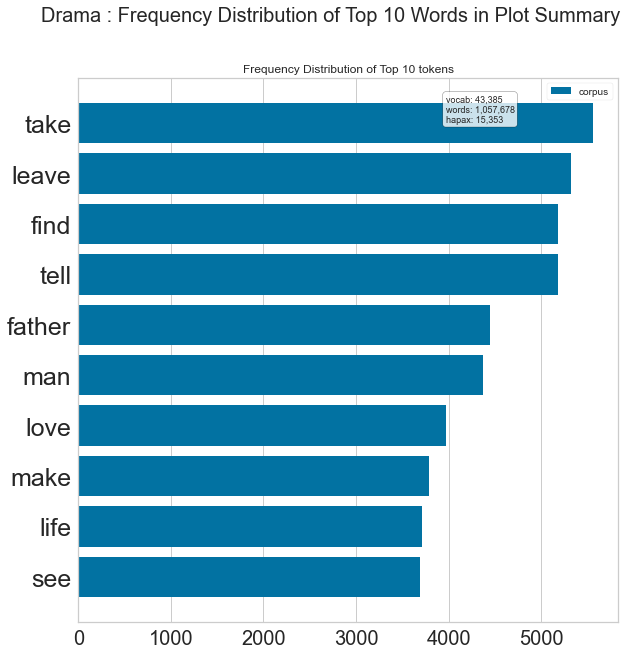

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [52]:
drama_plot = new_df.loc[new_df['labels'] == 1, ['Plot']]
drama_plotlist = [x for x in drama_plot['Plot'].str.split()]
drama_plotlist = list(itertools.chain(*drama_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(drama_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Drama : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

In [53]:
# The wordcloud below shows the 20 most frequent words in drama

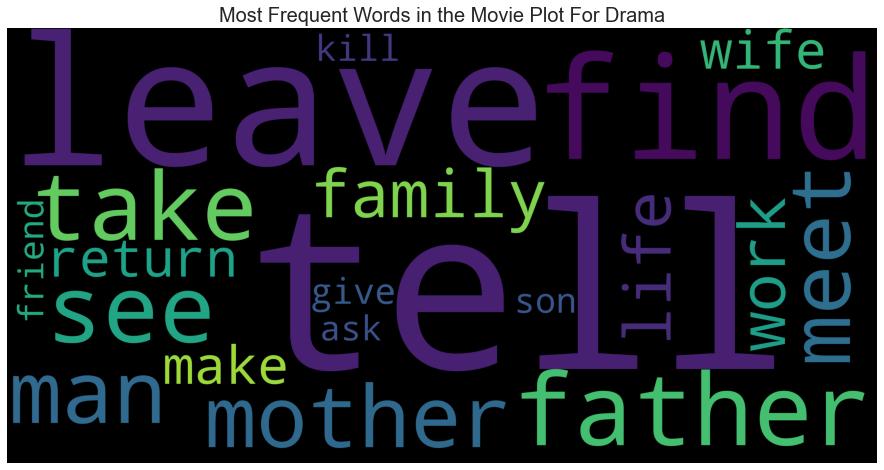

In [54]:
plot_corpus = ' '.join(drama_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Drama', fontsize = 20)
plt.show()

Comedy

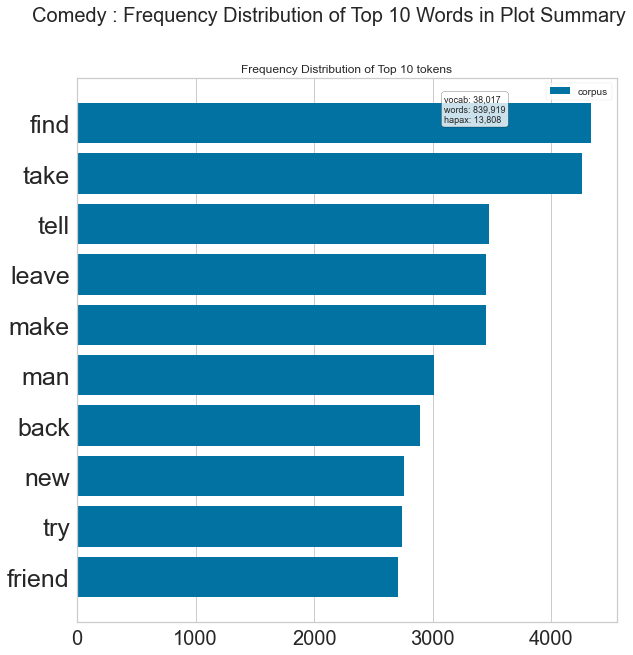

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [55]:
comedy_plot = new_df.loc[new_df['labels'] == 2, ['Plot']]
comedy_plotlist = [x for x in comedy_plot['Plot'].str.split()]
comedy_plotlist = list(itertools.chain(*comedy_plotlist))


count = CountVectorizer()
docs       = count.fit_transform(comedy_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Comedy : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

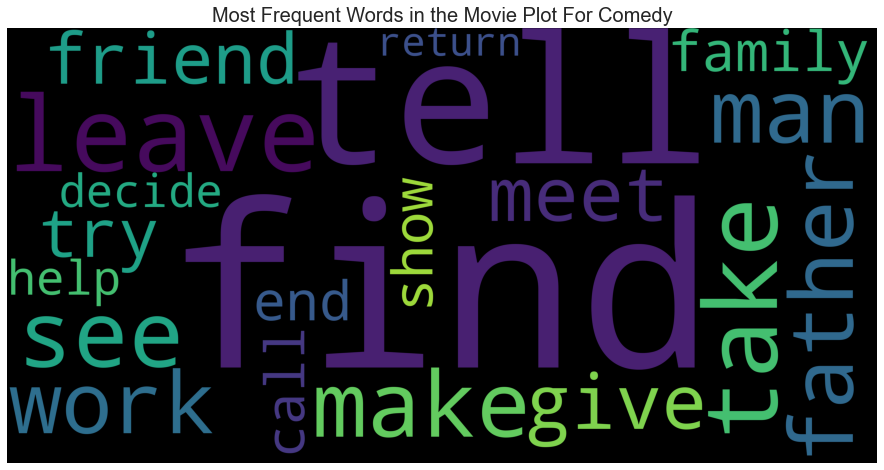

In [56]:
plot_corpus = ' '.join(comedy_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words = 20, height=2000, width=4000, random_state = 42, 
                          normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Comedy', fontsize = 20)
plt.show()

Horror

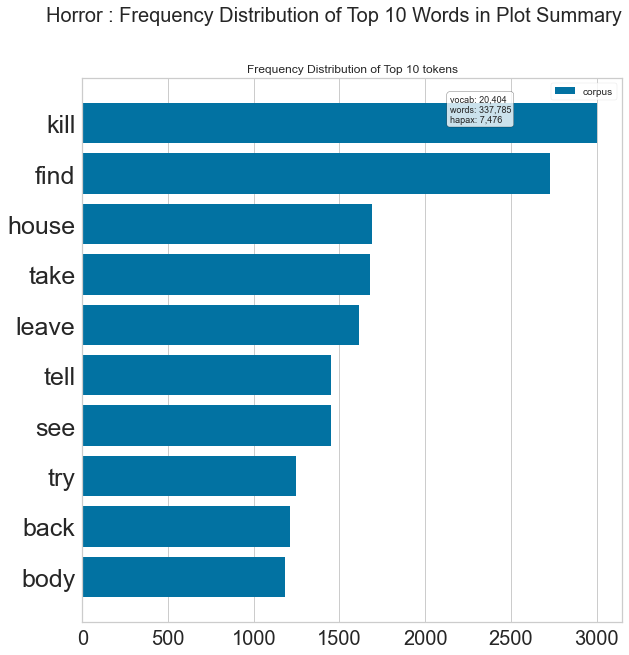

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [57]:
horror_plot = new_df.loc[new_df['labels'] == 3, ['Plot']]
horror_plotlist = [x for x in horror_plot['Plot'].str.split()]
horror_plotlist = list(itertools.chain(*horror_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(horror_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Horror : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

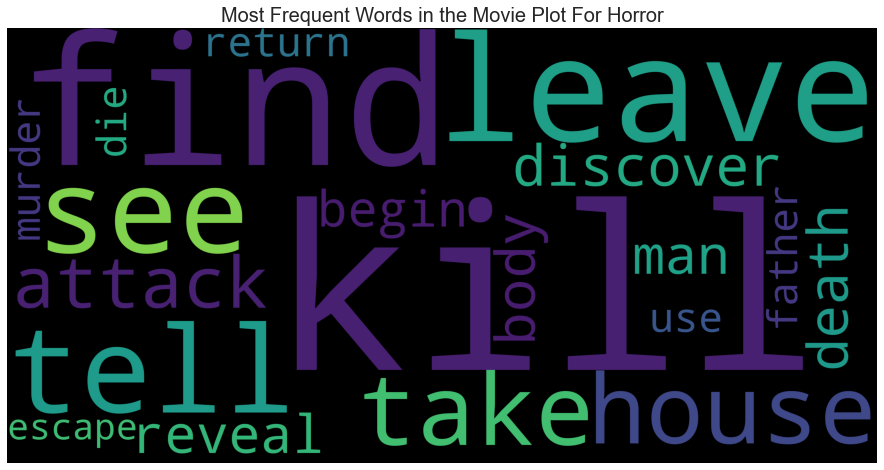

In [58]:
plot_corpus = ' '.join(horror_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Horror', fontsize = 20)
plt.show()

Action

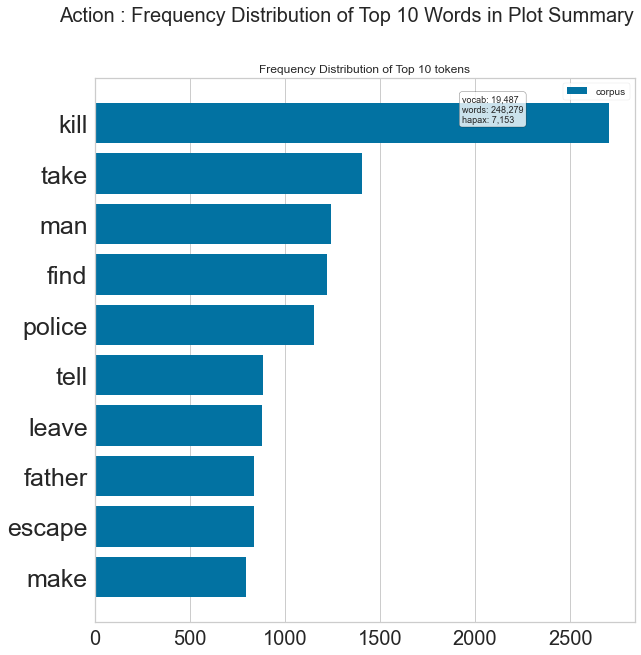

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [59]:
action_plot = new_df.loc[new_df['labels'] == 4, ['Plot']]
action_plotlist = [x for x in action_plot['Plot'].str.split()]
action_plotlist = list(itertools.chain(*action_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(action_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Action : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

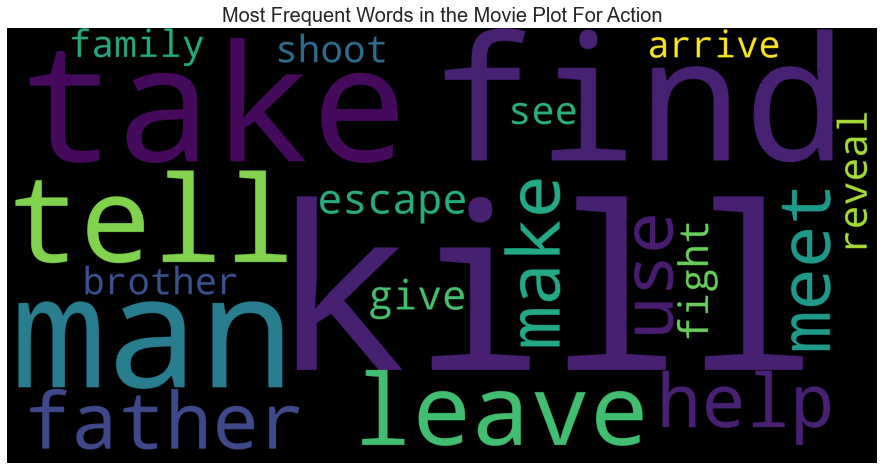

In [60]:
plot_corpus = ' '.join(action_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Action', fontsize = 20)
plt.show()

Thriller

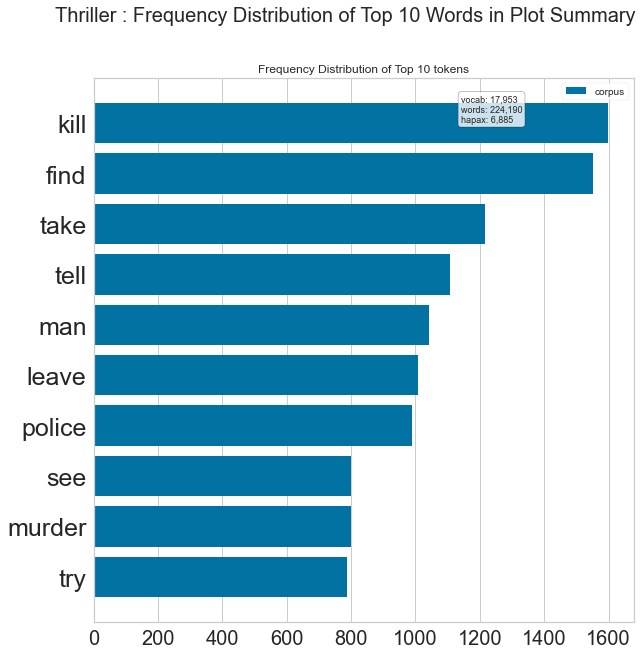

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [61]:
thriller_plot = new_df.loc[new_df['labels'] == 5, ['Plot']]
thriller_plotlist = [x for x in thriller_plot['Plot'].str.split()]
thriller_plotlist = list(itertools.chain(*thriller_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(thriller_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Thriller : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

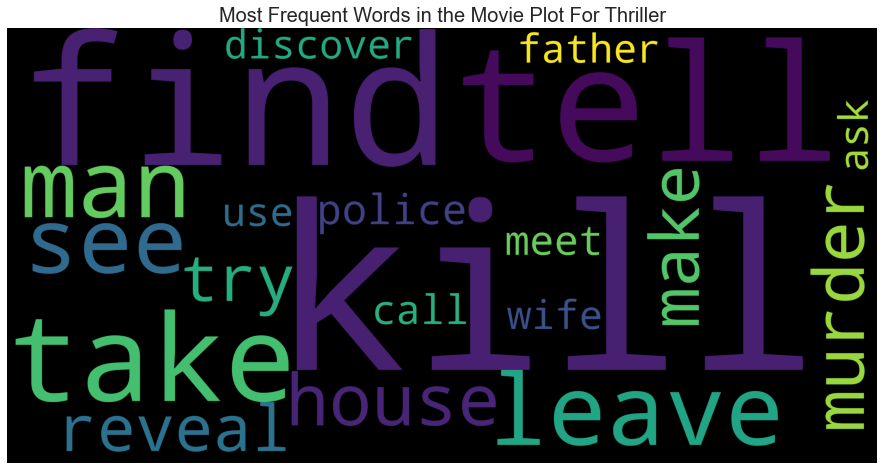

In [62]:
plot_corpus = ' '.join(thriller_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Thriller', fontsize = 20)
plt.show()

Romance

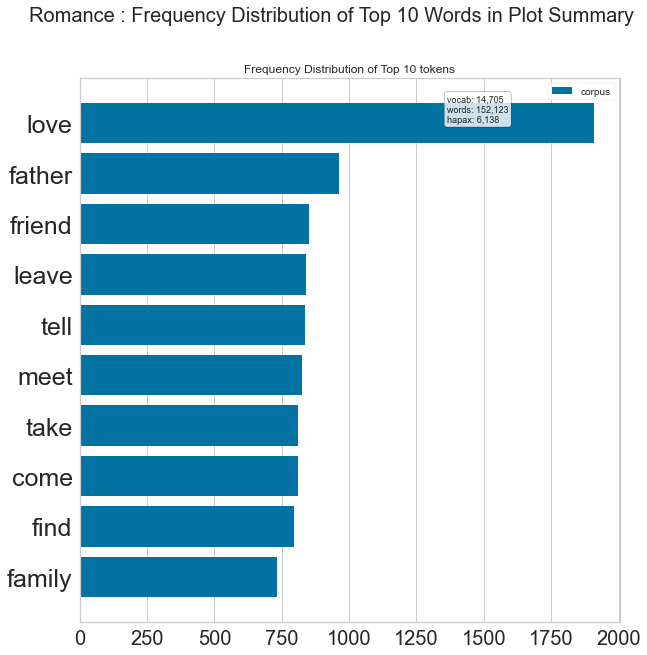

<AxesSubplot:title={'center':'Frequency Distribution of Top 10 tokens'}>

In [63]:
romance_plot = new_df.loc[new_df['labels'] == 6, ['Plot']]
romance_plotlist = [x for x in romance_plot['Plot'].str.split()]
romance_plotlist = list(itertools.chain(*romance_plotlist))

count = CountVectorizer()
docs       = count.fit_transform(romance_plotlist)
features   = count.get_feature_names()


fig = plt.figure(figsize=(10, 10))
plt.suptitle('Romance : Frequency Distribution of Top 10 Words in Plot Summary', size = 20)
plt.yticks(fontsize = 25)
plt.xticks(fontsize = 20)
plt.gcf().subplots_adjust(left=0.15)

visualizer = FreqDistVisualizer(features = features, n=10, orient='h')
visualizer.fit(docs)
visualizer.show()

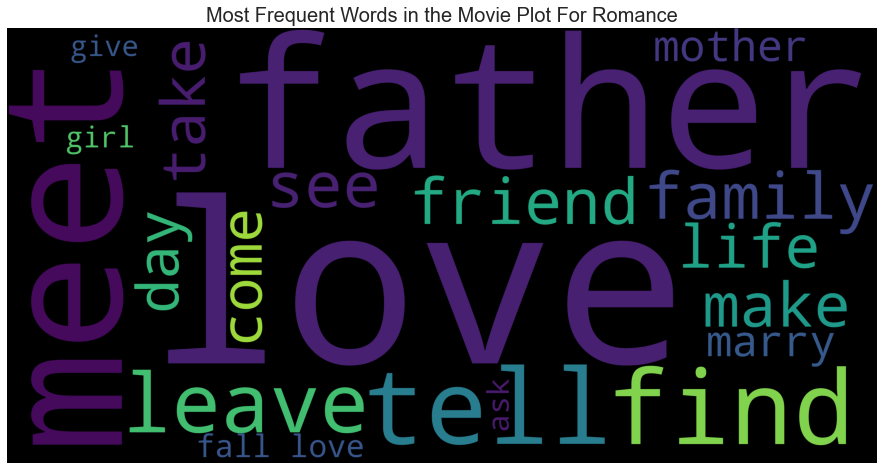

In [64]:
plot_corpus = ' '.join(romance_plotlist)
plot_wordcloud = WordCloud(stopwords=STOPWORDS, background_color='black', max_words=20, height=2000, width=4000, random_state = 42, 
                           normalize_plurals = False).generate(plot_corpus)

# Plot the wordcloud
fig, ax = plt.subplots(figsize=(16,8))
plt.imshow(plot_wordcloud)
plt.axis('off')
plt.title('Most Frequent Words in the Movie Plot For Romance', fontsize = 20)
plt.show()

# Modelling

In [65]:
new_df.head()

,Genre,Plot,labels
0,comedy,film family move suburb hope quiet life thing ...,2
1,comedy,head baseball game nearby ballpark sport fan m...,2
2,comedy,plot black woman dentist toothache give laugh ...,2
3,drama,beautiful summer day father mother take daught...,1
4,drama,thug accost girl leave workplace man rescue th...,1


In [66]:
data = new_df

In [67]:
data.Plot

0        film family move suburb hope quiet life thing ...
1        head baseball game nearby ballpark sport fan m...
2        plot black woman dentist toothache give laugh ...
3        beautiful summer day father mother take daught...
4        thug accost girl leave workplace man rescue th...
                               ...                        
14492    hasan twelve year old boy live young sibling m...
14493    night three car carry small group man police o...
14494    film open senegalese boy name khadim tell litt...
14495      musician salih gürkan describe adventure cousin
14496    zafer sailor live mother döndü coastal village...
Name: Plot, Length: 14497, dtype: object

In [68]:
from gensim.models.ldamodel import LdaModel

In [ ]:
words = []
for text in data.Plot:
    for word in nlp(text):
        words.append(word.text)
print (f'There were originally {len(set(words))} words.')

In [ ]:
from collections import Counter

counter = Counter()
for word in words:
    counter[word] +=1

In [ ]:
keys = []
values = []
for key, value in sorted(counter.items(), reverse=True, key=lambda item: item[1]):
    if value > 2:
        keys.append(key)
        values.append(value)
        
zipf = pd.DataFrame(data={'term':keys, 'frequency': values})
print(f'There are now {len(zipf)} unique words.')

Topic modelling with Gensim

In [ ]:
texts = []
keep_words = set(zipf.term.tolist())

In [ ]:
keep_words

In [ ]:
for text in data.Plot:
    doc = nlp(text)
    text_words = [token.text for token in doc if token.text in keep_words]
    texts.append(text_words)
    
print(texts[0])

Dictionary of words found in the corpus

In [ ]:
import gensim

In [ ]:
from gensim import corpora

dictionary = corpora.Dictionary(texts)
print(dictionary)

In [ ]:
#from gensim.utils import lemmatize
#from nltk.corpus import stopwords

In [ ]:
dictionary

In [ ]:
from gensim import models

#train the model
bow_corpus = [dictionary.doc2bow(text) for text in texts]
tfidf = models.TfidfModel(bow_corpus)
tfidf_corpus = tfidf[bow_corpus]

# LSA

In [ ]:
lsa_model = models.LsiModel(tfidf_corpus, id2word = dictionary, num_topics = 6)
corpus_lsa = lsa_model[tfidf_corpus]

In [ ]:
latent_topics = lsa_model.print_topics(6)

for latent_topic in latent_topics:
    print(f'Topic-{latent_topic[0]:<3}: {latent_topic[1]} \n\n')

In [ ]:
# Compute Coherence Score using c_v
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lsa = CoherenceModel(model=lsa_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lsa = coherence_model_lsa.get_coherence()
print('\nCoherence Score: ', coherence_lsa)

# LDA

In [ ]:
lda_model = models.LdaModel(tfidf_corpus, id2word = dictionary, num_topics = 6)
corpus_lda = lda_model[tfidf_corpus]
lda_topics = lda_model.print_topics()
for lda_topic in lda_topics:
    print(f'Topic-{lda_topic[0]:<3}: {lda_topic[1]} \n\n')

# Topic Visualization

In [ ]:
#Install pyLDAvis for visualization
!pip install pyLDAvis

In [ ]:
pyLDAvis.enable_notebook()
pyLDAvis.gensim_models.prepare(lda_model, corpus_lda, dictionary)

In [ ]:
# Compute Coherence Score using c_v
from gensim.models.coherencemodel import CoherenceModel
coherence_model_lda = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)